<a href="https://colab.research.google.com/github/Begizew2112/10academykifiya-AIM-week0/blob/main/isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
file_path = 'drive/MyDrive/AirQualityUCI.csv'
df = pd.read_csv(file_path , sep=';' ,engine= 'python')

In [17]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [18]:
df.shape

(9471, 17)

In [59]:
columns = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
df1 =df[columns]

In [22]:
df1.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,"2,6","11,9",166.0,113.0
1,2,"9,4",103.0,92.0
2,"2,2","9,0",131.0,114.0
3,"2,2","9,2",172.0,122.0
4,"1,6","6,5",131.0,116.0


In [30]:
df1 =df1.replace(-200 , np.nan)

In [31]:
df1.isnull().sum()

,0
CO(GT),114
C6H6(GT),114
NOx(GT),1753
NO2(GT),1756


In [32]:
df2 = df1.dropna()

In [33]:
df2.shape

(7715, 4)

In [53]:
df2.dtypes #identify the data types that the columns have

,0
CO(GT),object
C6H6(GT),object
NOx(GT),float64
NO2(GT),float64


In [67]:
#replace all the , value with the . value to the correct format
df3 = df2.apply(lambda x : x.str.replace(',','.') if x.dtype == 'object' else x)

In [68]:
df3.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166.0,113.0
1,2,9.4,103.0,92.0
2,2.2,9.0,131.0,114.0
3,2.2,9.2,172.0,122.0
4,1.6,6.5,131.0,116.0


In [71]:
df3[['CO(GT)','C6H6(GT)']] = df3[['CO(GT)','C6H6(GT)']].astype(float)


In [77]:
df3.dtypes # this is the correct format to the next analysis

,0
CO(GT),float64
C6H6(GT),float64
NOx(GT),float64
NO2(GT),float64


## Define the training parameters

In [78]:
# Parameters
n_estimators = 100  # Number of trees
contamination = 0.01  # Expected proportion of anomalies
sample_size = 256  # Number of samples used to train each tree

In [80]:
# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=n_estimators,
                            contamination=contamination,
                            max_samples=sample_size,
                            random_state=42)
iso_forest.fit(df3)

IsolationForest(contamination=0.01, max_samples=256, random_state=42)

## Calculate anomaly scores
The trained model has two useful functions:

decision_function will calculate the anomaly score in a similar way to what we discussed in the theory section.

predict will provide a binary label based on the contamination values. In our case, the 1% of instances with the worst anomaly scores will be given a value of -1. The other instances are given a value of 1.


In [84]:
# Calculate anomaly scores and classify anomalies
data = df3.loc[df3.index].copy()
data['anomaly_score'] = iso_forest.decision_function(df3)
data['anomaly'] = iso_forest.predict(df3)
data['anomaly'].value_counts()

,count
anomaly,
1,7637
-1,78


In [89]:
data.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly_score,anomaly
0,2.6,11.9,166.0,113.0,0.293894,1
1,2.0,9.4,103.0,92.0,0.296615,1
2,2.2,9.0,131.0,114.0,0.300671,1
3,2.2,9.2,172.0,122.0,0.298817,1
4,1.6,6.5,131.0,116.0,0.304219,1


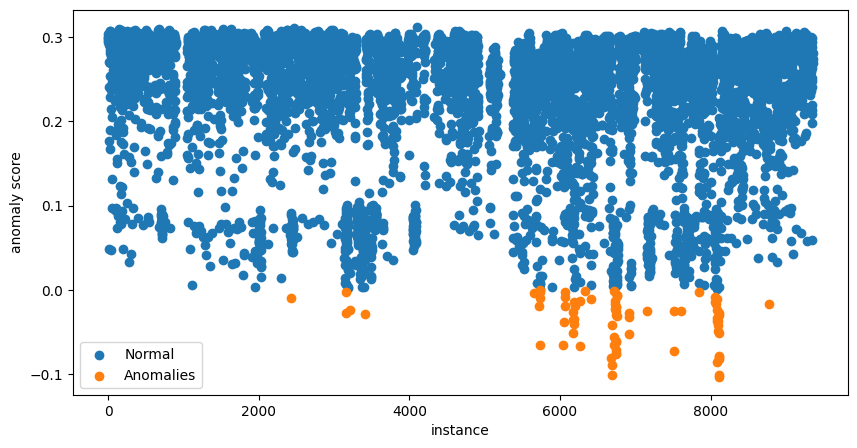

In [92]:
#visualizing the result
plt.figure(figsize=(10,5))
# Plot normal instances
normal = data[data['anomaly']==1]
plt.scatter(normal.index, normal['anomaly_score'],label ='Normal')
#plot the anomalies instance
anomalies = data[data['anomaly']==-1]
plt.scatter(anomalies.index,anomalies['anomaly_score'],label ='Anomalies' )
plt.xlabel('instance')
plt.ylabel('anomaly score')
plt.legend()
plt.show()


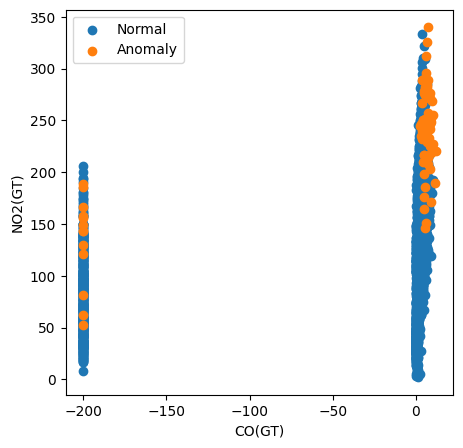

In [97]:
# Visualization of the results
# Visualization of the results
plt.figure(figsize=(5, 5))

# Plot non-anomalies then anomalies
plt.scatter(normal['CO(GT)'], normal['NO2(GT)'], label='Normal')
plt.scatter(anomalies['CO(GT)'], anomalies['NO2(GT)'], label='Anomaly')
plt.xlabel("CO(GT)")
plt.ylabel("NO2(GT)")
plt.legend()
plt.show()